In [120]:
import pandas as pd
df = pd.read_csv(r'https://gist.githubusercontent.com/Kimmirikwa/b69d0ea134820ea52f8481991ffae93e/raw/4db7b1698035ee29885d10e1a59bd902716ae168/student_results.csv')
print(df)

   id    name  phone sex and age test number  term 1  term 2  term 3
0   1    Mike    134        m_12      test 1      76      84      87
1   2   Linda    270        f_13      test 1      88      90      73
2   3     Sam    210        m_11      test 1      78      74      80
3   4  Esther    617        f_12      test 1      68      75      74
4   5    Mary    114        f_14      test 1      65      67      64
5   1    Mike    134        m_12      test 2      85      80      90
6   2   Linda    270        f_13      test 2      87      82      94
7   3     Sam    210        m_11      test 2      80      87      80
8   4  Esther    617        f_12      test 2      70      75      78
9   5    Mary    114        f_14      test 2      68      70      63


In [124]:
# Split 'sex and age' into 'sex' and 'age'
df[['sex', 'age']] = df['sex and age'].str.split('_', expand=True)
df = df.drop(columns=['sex and age'])
df


,id,name,phone,test number,term 1,term 2,term 3,sex,age
0,1,Mike,134,test 1,76,84,87,m,12
1,2,Linda,270,test 1,88,90,73,f,13
2,3,Sam,210,test 1,78,74,80,m,11
3,4,Esther,617,test 1,68,75,74,f,12
4,5,Mary,114,test 1,65,67,64,f,14
5,1,Mike,134,test 2,85,80,90,m,12
6,2,Linda,270,test 2,87,82,94,f,13
7,3,Sam,210,test 2,80,87,80,m,11
8,4,Esther,617,test 2,70,75,78,f,12
9,5,Mary,114,test 2,68,70,63,f,14


In [146]:
# Pivot 'test number' into separate columns for 'test 1' and 'test 2'
df_pivoted = df.pivot_table(index=['id', 'name', 'phone', 'sex', 'age'], 
                            columns='test number', 
                            values=['term 1', 'term 2', 'term 3']).reset_index()
print(df_pivoted.head())


            id    name phone sex age term 1        term 2        term 3       
test number                          test 1 test 2 test 1 test 2 test 1 test 2
0            1    Mike   134   m  12   76.0   85.0   84.0   80.0   87.0   90.0
1            2   Linda   270   f  13   88.0   87.0   90.0   82.0   73.0   94.0
2            3     Sam   210   m  11   78.0   80.0   74.0   87.0   80.0   80.0
3            4  Esther   617   f  12   68.0   70.0   75.0   75.0   74.0   78.0
4            5    Mary   114   f  14   65.0   68.0   67.0   70.0   64.0   63.0


In [152]:
# Calculate the average scores across all terms and tests
df_pivoted['average_score'] = df_pivoted[
    [('term 1', 'test 1'), ('term 1', 'test 2'), 
     ('term 2', 'test 1'), ('term 2', 'test 2'), 
     ('term 3', 'test 1'), ('term 3', 'test 2')]
].mean(axis=1)

print(df_pivoted[['name', 'average_score']])



               name average_score
test number                      
0              Mike     83.666667
1             Linda     85.666667
2               Sam     79.833333
3            Esther     73.333333
4              Mary     66.166667


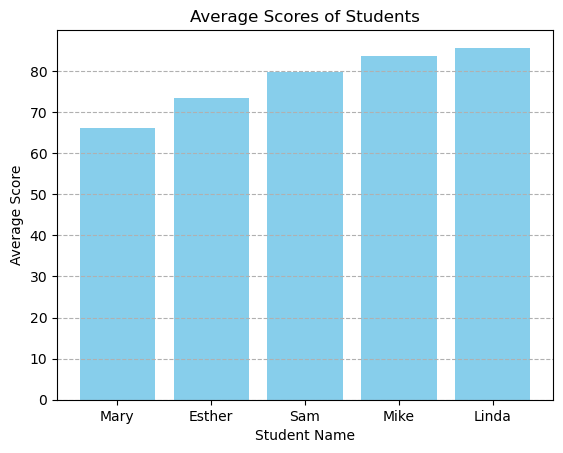

In [164]:
import matplotlib.pyplot as plt
df_pivoted_sorted = df_pivoted.sort_values(by='average_score', ascending=True)
plt.figure()
plt.bar(df_pivoted_sorted['name'], df_pivoted_sorted['average_score'], color='skyblue')
plt.title('Average Scores of Students')
plt.xlabel('Student Name')
plt.ylabel('Average Score')
plt.grid(axis='y', linestyle='--')

plt.show()


First we split up the column sex_age into 2 seperate columns, then we moved test 1 and 2 to be their own columns, reducing the amount of rows by half. Linda scored the highest average while Mary scored the lowest. 